In [0]:
#Importing common packages

import tensorflow as tf
import pandas as pd
import numpy as np

In [0]:
#Enable Eager Execution

tf.enable_eager_execution()

In [3]:
#Uploading files to Google Colab

from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (2).csv


In [0]:
import io

data = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
510,511,15568506,Forbes,524,Germany,Female,31,10,67238.98,2,1,1,161811.23,0
9421,9422,15589589,Bryan,613,France,Male,34,5,144094.20,1,1,0,44510.26,0
5799,5800,15649853,Craig,625,France,Female,45,3,0.00,1,1,1,184474.15,1
7943,7944,15774250,Gallo,532,France,Male,42,1,159024.71,1,1,0,100982.93,1
6111,6112,15803337,Baresi,648,France,Male,23,9,168372.52,1,1,0,134676.72,0


In [0]:
#Removing the below columns as they are not important in prediction
#Changing dataframe to maintain customer number column incase required later


data = data.drop(['RowNumber'], axis=1)
df = data.drop(['Surname'], axis=1)
df = df.drop(['CustomerId'], axis=1)

In [8]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7303,653,France,Male,43,0,0.00,2,1,0,27862.58,0
2367,620,Germany,Male,39,9,159492.79,1,1,0,80582.34,1
8224,702,France,Male,50,3,0.00,2,0,0,94949.84,0
9290,850,France,Male,33,8,73059.38,1,1,1,186281.00,0
468,536,France,Male,35,8,0.00,2,1,0,64833.28,0


In [9]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Tenure,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,10000,NaN,NaN,NaN,76485.9,62397.4,0,0,97198.5,127644,250898
NumOfProducts,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4
HasCrCard,10000,NaN,NaN,NaN,0.7055,0.45584,0,0,1,1,1
IsActiveMember,10000,NaN,NaN,NaN,0.5151,0.499797,0,0,1,1,1
EstimatedSalary,10000,NaN,NaN,NaN,100090,57510.5,11.58,51002.1,100194,149388,199992


In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [0]:
df['Balance']=df['Balance'].astype('float32')
df['EstimatedSalary']=df['EstimatedSalary'].astype('float32')
df['CreditScore']=df['CreditScore'].astype('int32')
df['Age']=df['Age'].astype('int32')
df['Tenure']=df['Tenure'].astype('int32')
df['NumOfProducts']=df['NumOfProducts'].astype('int32')
df['HasCrCard']=df['HasCrCard'].astype('int32')
df['IsActiveMember']=df['IsActiveMember'].astype('int32')
df['Exited']=df['Exited'].astype('int32')

In [12]:
df.dtypes

CreditScore          int32
Geography           object
Gender              object
Age                  int32
Tenure               int32
Balance            float32
NumOfProducts        int32
HasCrCard            int32
IsActiveMember       int32
EstimatedSalary    float32
Exited               int32
dtype: object

In [13]:
#Encoding categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df.iloc[:, 1] = labelencoder_df.fit_transform(df.iloc[:, 1])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.000000,1,1,1,101348.882812,1
1,608,2,Female,41,1,83807.859375,1,0,1,112542.578125,0
2,502,0,Female,42,8,159660.796875,3,1,0,113931.570312,1
3,699,0,Female,39,1,0.000000,2,0,0,93826.632812,0
4,850,2,Female,43,2,125510.820312,1,1,1,79084.101562,0


In [14]:
#Encoding categorical data

labelencoder_df_2 = LabelEncoder()
df.iloc[:, 2] = labelencoder_df_2.fit_transform(df.iloc[:, 2])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,101348.882812,1
1,608,2,0,41,1,83807.859375,1,0,1,112542.578125,0
2,502,0,0,42,8,159660.796875,3,1,0,113931.570312,1
3,699,0,0,39,1,0.000000,2,0,0,93826.632812,0
4,850,2,0,43,2,125510.820312,1,1,1,79084.101562,0


In [0]:
# Assigning the label Column to targetVariable 

targetVariable = 'Exited'

In [0]:
# Create Input Feature DataFrame X and Output Label Y for the Model Training

X=df.iloc[:,df.columns!=targetVariable]
Y=df.iloc[:,df.columns==targetVariable]

In [0]:
# Train Test Split

from sklearn.model_selection import train_test_split

np.random.seed(123)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [0]:
#Normalizing data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
y_train = y_train.to_numpy()

In [0]:
y_test = y_test.to_numpy()

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=(10,)))

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [25]:
#Compile the model
from keras import optimizers

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Using TensorFlow backend.


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 282
Trainable params: 262
Non-trainable params: 20
_________________________________________________________________


In [27]:
#Building initial model

model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=100,
          batch_size=32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 2s 236us/sample - loss: 0.5864 - acc: 0.7057 - val_loss: 0.5006 - val_acc: 0.7983
Epoch 2/100
7000/7000 [==============================] - 0s 65us/sample - loss: 0.5033 - acc: 0.7954 - val_loss: 0.4983 - val_acc: 0.7983
Epoch 3/100
7000/7000 [==============================] - 0s 64us/sample - loss: 0.5020 - acc: 0.7954 - val_loss: 0.4973 - val_acc: 0.7983
Epoch 4/100
7000/7000 [==============================] - 0s 62us/sample - loss: 0.5011 - acc: 0.7954 - val_loss: 0.4963 - val_acc: 0.7983
Epoch 5/100
7000/7000 [==============================] - 0s 63us/sample - loss: 0.4999 - acc: 0.7954 - val_loss: 0.4951 - val_acc: 0.7983
Epoch 6/100
7000/7000 [==============================] - 0s 65us/sample - loss: 0.4991 - acc: 0.7954 - val_loss: 0.4938 - val_acc: 0.7983
Epoch 7/100
7000/7000 [==============================] - 0s 62us/sample - loss: 0.4978 - acc: 0.7954 - val_loss: 0.4926 - v

In [29]:
#Using GridSearchCV for identifying best parameters. Optimizing Optimizer, Batch Size and Epochs


# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(optimizer='SGD'):
	# create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=(10,)))
  model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
  model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
  model.add(tf.keras.layers.Dense(2, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

X = x_train
Y = y_train

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']
batch_size = [10, 20, 40]
epochs = [10, 50]

param_grid = dict(optimizer=optimizer,batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850857 using {'batch_size': 20, 'epochs': 50, 'optimizer': 'Adadelta'}
0.821857 (0.007210) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'SGD'}
0.819571 (0.009881) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'RMSprop'}
0.821000 (0.005647) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adagrad'}
0.815857 (0.007385) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adadelta'}
0.817000 (0.010197) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adam'}
0.845429 (0.009568) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
0.839429 (0.004023) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'RMSprop'}
0.841857 (0.004867) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adagrad'}
0.836429 (0.004426) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adadelta'}
0.844429 (0.000637) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adam'}
0.819286 (0.009296) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'SGD'}
0.819286 (0.006902) with

In [0]:
#Prediction using best params

y_pred = grid.predict(x_test)

In [41]:
#Accuracy Score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8526666666666667

In [0]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Function to create pretty looking confusion matrix with recall

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)

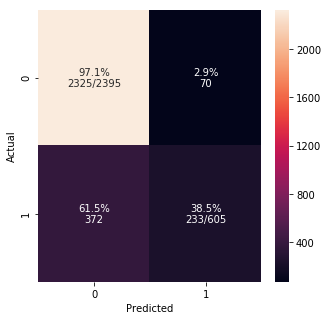

In [50]:
#Confusion Matrix

cm_analysis(y_test, y_pred, grid, grid.classes_, ymap=None, figsize=(5,5))